In [46]:
#Immporting all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import joblib

In [2]:
df = pd.read_csv(r"C:\Users\Venkatesh\Downloads\laptop.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [6]:
df['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [7]:
df['Ram'].value_counts()

Ram
8GB     601
4GB     367
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [8]:
 #Checking for null values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
#Appropriate datatype conversion
x = df[df['Inches'] == '?'].index
df.drop(x, inplace = True)
df['Inches'] = df['Inches'].astype('float64')

In [11]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0          float64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [12]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

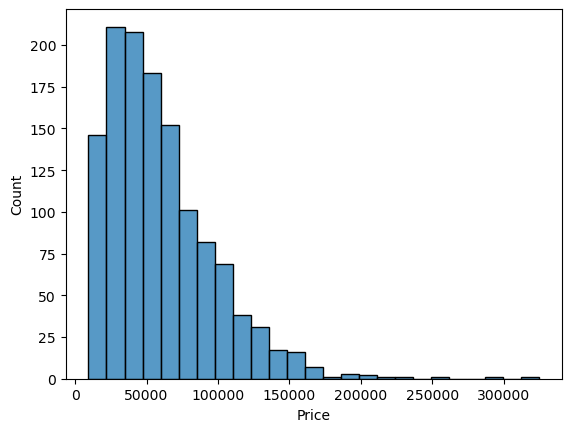

In [13]:
#Distribution of laptop prices
sns.histplot(df['Price'], bins=25)
plt.show()

In [14]:
df[df['Price'] == df['Price'].max()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.72


In [15]:
df[df['Price'] == df['Price'].min()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1215,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2GB,32GB SSD,Intel HD Graphics,Chrome OS,1.3kg,9270.72


In [16]:
#Prices of different brands
df.groupby('Company').mean('Price').sort_values(by = 'Price', ascending = False)

,Inches,Price
Company,,
Razer,14.514286,178282.491429
LG,15.066667,111834.720000
MSI,16.426415,91814.548891
Google,12.300000,89386.080000
Microsoft,16.833333,85903.788000
Apple,13.247619,83340.499886
Huawei,13.000000,75870.720000
Samsung,13.822222,75308.320000
Toshiba,14.327660,66747.370213


In [17]:
#grouped together with company and typename
x = df.groupby(['Company', 'TypeName']).mean('Price').reset_index()
x.set_index(['Company', 'TypeName'], inplace = True)
x.sort_values(by=['Company', 'Price'], ascending=[True, False])
#x.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Inches'], inplace = True)
x

Inches          Price
Company   TypeName                                    
Acer      2 in 1 Convertible  12.750000   37229.466600
          Gaming              16.237500   78221.700000
          Netbook             11.600000   16303.680000
          Notebook            15.465385   28778.645538
          Ultrabook           13.825000   47445.840000
Apple     Ultrabook           13.247619   83340.499886
Asus      2 in 1 Convertible  13.623077   52021.813292
          Gaming              16.722642   91762.525494
          Netbook             11.600000   15502.704000
          Notebook            15.732836   33412.015236
          Ultrabook           14.080000   68743.987200
Chuwi     Notebook            14.500000   16745.726400
Dell      2 in 1 Convertible  14.867857   60465.397886
          Gaming              16.402500  102211.979040
          Netbook             11.600000   27678.960000
          Notebook            15.544025   45888.995049
          Ultrabook           13.465957   79046.967523
          Workstation         15.770000  117231.238080
Fujitsu   Notebook            15.600000   38574.720000
Google    Ultrabook           12.300000   89386.080000
HP        2 in 1 Convertible  13.183333   80601.984000
          Gaming              16.875000   75875.160000
          Netbook             12.100000   53635.200000
          Notebook            15.279888   43791.787468
          Ultrabook           13.723529   82966.456376
          Workstation         16.207143  122527.064571
Huawei    Ultrabook           13.000000   75870.720000
LG        Ultrabook           15.066667  111834.720000
Lenovo    2 in 1 Convertible  13.684783   79234.402226
          Gaming              15.812500   70807.421700
          Netbook             11.825000   39200.760000
          Notebook            15.643103   42298.385710
          Ultrabook           13.986667   96874.584000
          Workstation         15.600000  126859.680000
MSI       Gaming              16.426415   91814.548891
Mediacom  2 in 1 Convertible  11.600000   15930.720000
          Notebook            13.766667   15682.080000
Microsoft Ultrabook           16.833333   85903.788000
Razer     Gaming              15.320000  219460.320000
          Ultrabook           12.500000   75337.920000
Samsung   2 in 1 Convertible  13.650000   65481.120000
          Netbook             11.600000   14332.320000
          Notebook            15.600000   90522.720000
          Ultrabook           13.980000   88391.520000
Toshiba   Notebook            14.622857   57769.220571
          Ultrabook           13.466667   92933.640000
Vero      Notebook            13.825000   11584.404000
Xiaomi    Notebook            15.600000   69236.028000
          Ultrabook           13.300000   51545.736000

In [18]:
df['TypeName'].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            28
Netbook                24
Name: count, dtype: int64

In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [20]:
df['Ram'] = df['Ram'].astype('str')

In [21]:
#Appropriate datatype conversion
df.drop(df[df['Weight'] == '?'].index, inplace = True)
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [22]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [23]:
#Removing outliers
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [24]:
df['Weight'].mean()
df['Weight'].min()
df['Weight'].max()

4.5

In [25]:
df.drop(df[df['Weight'].between(0,0.5)].index, inplace = True)

C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_26820\3138323672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Weight'].between(0,0.5)].index, inplace = True)


In [30]:
df['Weight'].mean()

2.0144172779136107

In [31]:
df['Weight'].min()

0.69

In [32]:
df['Weight'].max()

4.5

In [33]:
#Feature engineering based on laptop's weight
#Categorizationa
df['Heaviness'] = df['Weight'].map(lambda x: 'light' if x < 2 else 'Heavy') 

C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_26820\2626119693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Heaviness'] = df['Weight'].map(lambda x: 'light' if x < 2 else 'Heavy')


In [34]:
df['Heaviness'].value_counts()

Heaviness
Heavy    666
light    561
Name: count, dtype: int64

In [35]:
df1 = df.copy()

In [36]:
#Categorical encoding
df1 = pd.get_dummies(df1, columns=['Company', 'TypeName', 'Cpu', 'OpSys', 'ScreenResolution', 'Memory', 'Gpu', 'Heaviness'])

In [37]:
df1.head()

,Inches,Ram,Weight,Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,Heaviness_Heavy,Heaviness_light
0,13.3,8,1.37,71378.6832,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,47895.5232,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,30636.0000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,15.4,16,1.83,135195.3360,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,96095.8080,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [38]:
df1.isnull().sum()

Inches                     0
Ram                        0
Weight                     0
Price                      0
Company_Acer               0
                          ..
Gpu_Nvidia Quadro M520M    0
Gpu_Nvidia Quadro M620     0
Gpu_Nvidia Quadro M620M    0
Heaviness_Heavy            0
Heaviness_light            0
Length: 335, dtype: int64

In [39]:
#Train Test Split
X = df1.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")


Linear Regression MAE: 83110755975711.39
R-squared: -2.092858268019326e+20


In [41]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")

Random Forest MAE: 9987.92544094077
R-squared: 0.8029689207523909


In [42]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f'Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gb)}')
print(f"R-squared: {r2_score(y_test, y_pred_gb)}")

Gradient Boosting MAE: 11238.889654695433
R-squared: 0.788877030547254


In [43]:
#Cross validation
from sklearn.model_selection import GridSearchCV

# Example for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f'Optimized Random Forest MAE: {mean_absolute_error(y_test, y_pred_best_rf)}')
print(f"Optimized Random Forest R-squared: {r2_score(y_test, y_pred_best_rf)}")


Optimized Random Forest MAE: 9914.253411155614
Optimized Random Forest R-squared: 0.8058201791481092


In [44]:
#Feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
#print(feature_importances)
feature_importances

,feature,importance
1,Ram,0.508089
2,Weight,0.085295
25,TypeName_Notebook,0.083975
306,Gpu_Nvidia GeForce GTX 1070,0.024121
0,Inches,0.021342
...,...,...
102,Cpu_Intel Core i5 7200U 2.7GHz,0.000000
8,Company_Fujitsu,0.000000
246,Gpu_AMD Radeon R5 520,0.000000
101,Cpu_Intel Core i5 7200U 2.70GHz,0.000000


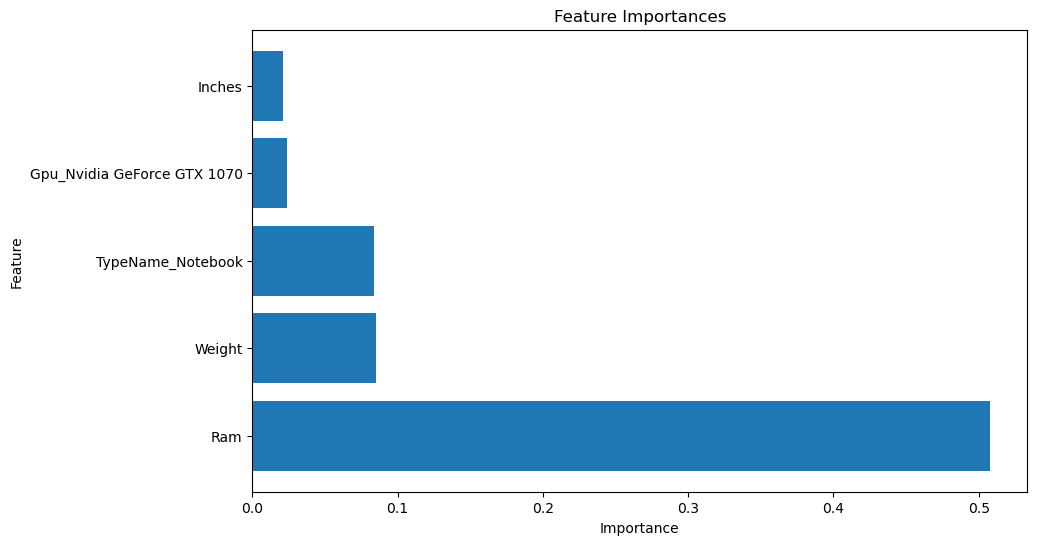

In [45]:


# Plot feature importances
important_features = feature_importances[feature_importances['importance'].between(0.02,0.6)]
important_features_sorted = important_features.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(important_features_sorted['feature'], important_features_sorted['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [48]:
#Loading the above developed rf model into the variable 'model'
model = joblib.load('best_model.pkl')

Questions to Explore:
1. Which features have the most significant impact on laptop prices?
 As seen in the above graph, Ram has the most significant impact on laptop prices followed by weight.

2.Can the model accurately predict the prices of laptops from lesser-known brands?

In [49]:
df['Company'].value_counts()

Company
Lenovo       275
Dell         273
HP           264
Asus         150
Acer         101
MSI           52
Toshiba       45
Apple         21
Samsung        9
Mediacom       7
Microsoft      5
Xiaomi         4
Vero           4
Razer          4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [68]:
Lesser_Known_Brands = ['Chuwi', 'Google', 'LG', 'Huawei', 'Fujitsu']
subset_x = df[df['Company'].isin(Lesser_Known_Brands)]
subset_x = pd.get_dummies(subset_x, columns = ['Company', 'TypeName', 'Cpu', 'OpSys', 'ScreenResolution', 'Memory', 'Gpu', 'Heaviness'])
subset_x.drop('Price', axis = 1, inplace = True)
filtered_df = df[df['Company'].isin(Lesser_Known_Brands)]
subset_y = filtered_df['Price']
subset_X_train, subset_X_test, subset_y_train, subset_y_test = train_test_split(subset_x, subset_y, test_size=0.2, random_state=42)


In [73]:
rf.fit(subset_X_train, subset_y_train)
predictions = rf.predict(subset_X_test)
accuracy = r2_score(subset_y_test, predictions)
print(f'Accuracy on lesser-known brands: {accuracy}')

Accuracy on lesser-known brands: 0.9527327295106655


Answer: The model works great on lesser known brands too.

3.Does the brand of the laptop significantly influence its price?

In [ ]:
feature_importances
brand_importance = feature_importances[feature_importances['feature'].str.startswith('Company')]
print(f"Importance of 'Company' Lenovo : {brand_importance['importance'].values[0]}") 
brand_importance

Answer: No, the brand of a laptop does not significantly contributr to the price.

4.How well does the model perform on laptops with high-end specifications compared to budget laptops?

In [98]:
df['Ram'].value_counts()

Ram
8     591
4     362
16    187
6      38
12     24
2      22
24      2
1       1
Name: count, dtype: int64

In [99]:
high_end = X_test[X_test['Ram'] >= 8]  # Example criteria for high-end laptops
budget = X_test[X_test['Ram'] <= 6]  # Example criteria for budget laptops

high_end_y = y_test[X_test['Ram'] >= 8]
budget_y = y_test[X_test['Ram'] <= 6]

high_end_predictions = model.predict(high_end)
budget_predictions = model.predict(budget)

high_end_accuracy = r2_score(high_end_y, high_end_predictions)
budget_accuracy = r2_score(budget_y, budget_predictions)

print(f'Accuracy on high-end laptops: {high_end_accuracy}')
print(f'Accuracy on budget laptops: {budget_accuracy}')


Accuracy on high-end laptops: 0.7012332983130504
Accuracy on budget laptops: 0.7333073828944081


Answer: The mopdel performs good on both high end and low end laptops. But, the accuracy is somewhat lower when compared to the actual accuracy.

5. What are the limitations and challenges in predicting laptop prices accurately?

Feature Engineering: Accurately capturing all relevant features and interactions.
Market Dynamics: Rapid changes in technology and prices.
Data Quality: Incomplete or biased data.
Brand Perception: Subjective factors influencing price.
New Releases: Predicting prices for laptops with features not present in the training data.